In [ ]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

## **Data Preparation**

In [ ]:
data = pd.read_csv("train.csv", ",")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
data.shape

(1000, 12)

In [ ]:
# data = pd.read_csv("train_semi.csv", ",")
# data.head()
# data.shape

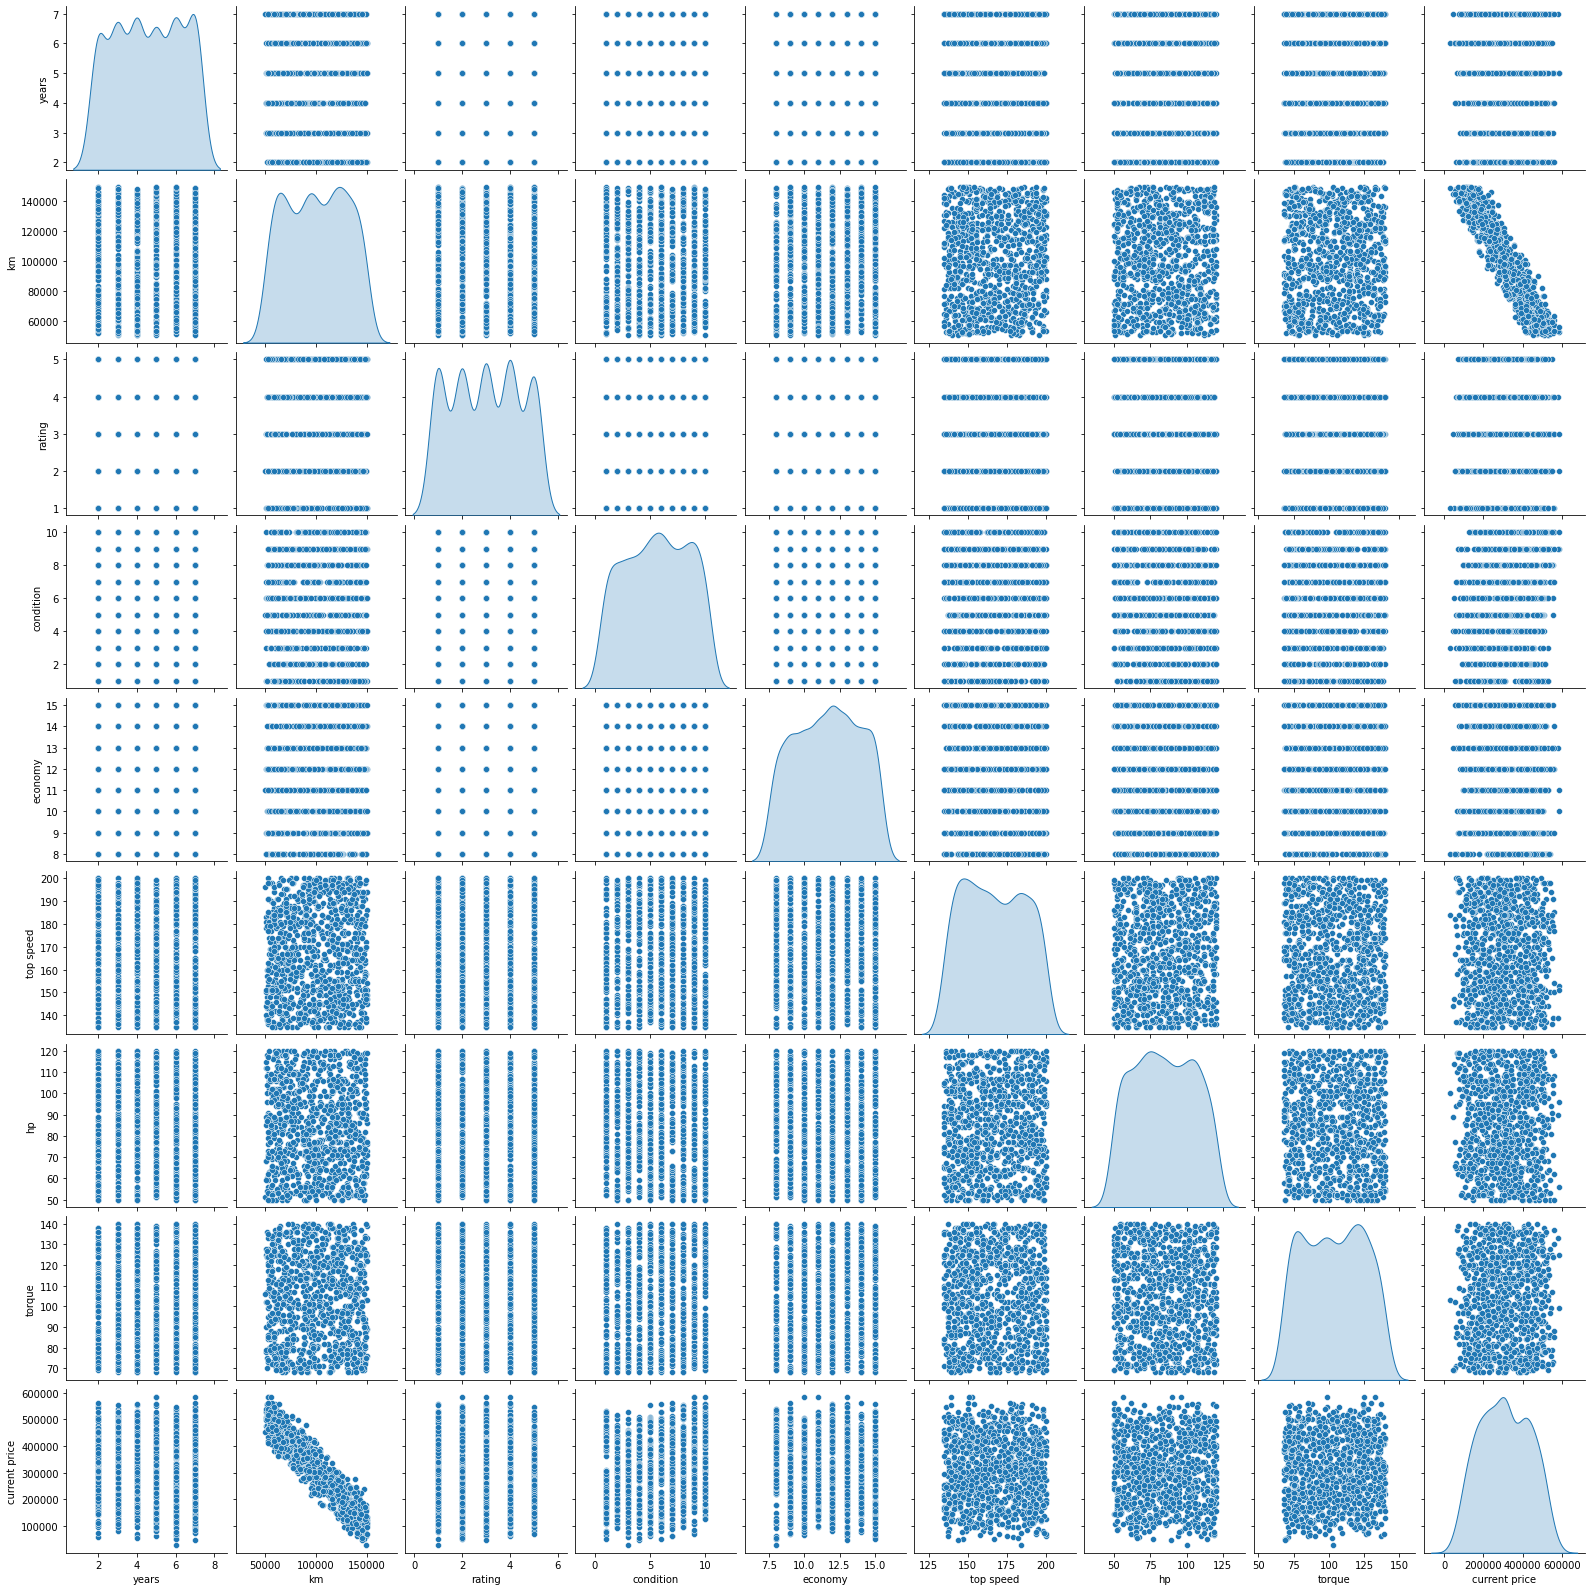

In [ ]:
sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[2.790000e+02 6.405200e+05 7.510240e+05 4.000000e+00 1.292510e+05
  2.000000e+00 3.000000e+00 1.300000e+01 1.420000e+02 7.700000e+01
  1.100000e+02 1.786425e+05]
 [6.200000e+02 5.112580e+05 7.948000e+05 6.000000e+00 1.043080e+05
  2.000000e+00 9.000000e+00 1.400000e+01 1.770000e+02 9.500000e+01
  9.700000e+01 2.617320e+05]
 [7.250000e+02 6.785350e+05 7.088160e+05 6.000000e+00 9.693300e+04
  3.000000e+00 1.000000e+00 1.100000e+01 1.460000e+02 1.200000e+02
  1.040000e+02 3.024230e+05]
 [6.560000e+02 6.146710e+05 8.504940e+05 4.000000e+00 5.244300e+04
  2.000000e+00 6.000000e+00 1.500000e+01 1.630000e+02 8.800000e+01
  1.240000e+02 5.265025e+05]
 [6.660000e+02 6.357630e+05 8.223260e+05 3.000000e+00 1.305400e+05
  1.000000e+00 1.000000e+00 1.200000e+01 1.590000e+02 9.300000e+01
  7.500000e+01 2.069995e+05]], shape=(5, 12), dtype=float32)


In [ ]:
X = tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[4.00000e+00 1.29251e+05 2.00000e+00 3.00000e+00 1.30000e+01 1.42000e+02
  7.70000e+01 1.10000e+02]
 [6.00000e+00 1.04308e+05 2.00000e+00 9.00000e+00 1.40000e+01 1.77000e+02
  9.50000e+01 9.70000e+01]
 [6.00000e+00 9.69330e+04 3.00000e+00 1.00000e+00 1.10000e+01 1.46000e+02
  1.20000e+02 1.04000e+02]
 [4.00000e+00 5.24430e+04 2.00000e+00 6.00000e+00 1.50000e+01 1.63000e+02
  8.80000e+01 1.24000e+02]
 [3.00000e+00 1.30540e+05 1.00000e+00 1.00000e+00 1.20000e+01 1.59000e+02
  9.30000e+01 7.50000e+01]], shape=(5, 8), dtype=float32)


In [ ]:
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1)
print(y[:5])

(5,)
tf.Tensor(
[[178642.5]
 [261732. ]
 [302423. ]
 [526502.5]
 [206999.5]], shape=(5, 1), dtype=float32)


In [ ]:
normalizer = Normalization(axis = -1, mean = 5, variance = 4)
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [ ]:
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,10,6,7,8],
                            [32,1,56,3,5]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.7439795 , -0.26726124, -0.72800297,  0.3922322 ,  0.2672614 ],
       [-0.6695816 ,  1.3363062 , -0.6860028 ,  0.9805806 ,  1.0690452 ],
       [ 1.4135611 , -1.069045  ,  1.4140056 , -1.3728131 , -1.3363061 ]],
      dtype=float32)>

In [ ]:
print(X.shape)

(1000, 8)


In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [ ]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
for x,y in train_dataset:
  print(x,y)
  break

tf.Tensor(
[[6.00000e+00 9.69330e+04 3.00000e+00 1.00000e+00 1.10000e+01 1.46000e+02
  1.20000e+02 1.04000e+02]
 [5.00000e+00 7.80250e+04 1.00000e+00 9.00000e+00 1.50000e+01 1.71000e+02
  9.40000e+01 1.32000e+02]
 [7.00000e+00 1.18659e+05 2.00000e+00 7.00000e+00 1.20000e+01 1.80000e+02
  6.60000e+01 1.20000e+02]
 [5.00000e+00 1.43526e+05 3.00000e+00 7.00000e+00 8.00000e+00 1.75000e+02
  1.10000e+02 1.37000e+02]
 [6.00000e+00 1.04308e+05 2.00000e+00 9.00000e+00 1.40000e+01 1.77000e+02
  9.50000e+01 9.70000e+01]
 [3.00000e+00 1.30540e+05 1.00000e+00 1.00000e+00 1.20000e+01 1.59000e+02
  9.30000e+01 7.50000e+01]
 [4.00000e+00 5.24430e+04 2.00000e+00 6.00000e+00 1.50000e+01 1.63000e+02
  8.80000e+01 1.24000e+02]
 [5.00000e+00 1.00534e+05 1.00000e+00 9.00000e+00 1.50000e+01 1.37000e+02
  7.20000e+01 1.19000e+02]
 [6.00000e+00 8.93540e+04 1.00000e+00 1.00000e+01 1.20000e+01 1.40000e+02
  5.60000e+01 1.27000e+02]
 [4.00000e+00 1.29251e+05 2.00000e+00 3.00000e+00 1.30000e+01 1.42000e+02
  7.70

In [ ]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.31518766,  1.0132637 , -0.71715826, -0.91459674,  0.6136699 ,
        -1.301998  , -0.35419205,  0.3123971 ],
       [ 0.8309489 ,  0.15622592, -0.71715826,  1.1808989 ,  1.058761  ,
         0.5187977 ,  0.5274618 , -0.30444944],
       [ 0.8309489 , -0.09717798, -0.0044545 , -1.6130953 , -0.27651256,
        -1.0939071 ,  1.751981  ,  0.02769868],
       [-0.31518766, -1.6258478 , -0.71715826,  0.13315108,  1.5038522 ,
        -0.2095206 ,  0.18459642,  0.97669333],
       [-0.88825595,  1.0575535 , -1.429862  , -1.6130953 ,  0.16857865,
        -0.41761154,  0.42950028, -1.3483436 ]], dtype=float32)>

In [ ]:
print(X[:5])

tf.Tensor(
[[4.00000e+00 1.29251e+05 2.00000e+00 3.00000e+00 1.30000e+01 1.42000e+02
  7.70000e+01 1.10000e+02]
 [6.00000e+00 1.04308e+05 2.00000e+00 9.00000e+00 1.40000e+01 1.77000e+02
  9.50000e+01 9.70000e+01]
 [6.00000e+00 9.69330e+04 3.00000e+00 1.00000e+00 1.10000e+01 1.46000e+02
  1.20000e+02 1.04000e+02]
 [4.00000e+00 5.24430e+04 2.00000e+00 6.00000e+00 1.50000e+01 1.63000e+02
  8.80000e+01 1.24000e+02]
 [3.00000e+00 1.30540e+05 1.00000e+00 1.00000e+00 1.20000e+01 1.59000e+02
  9.30000e+01 7.50000e+01]], shape=(5, 8), dtype=float32)


## **Model Creation and Training**

In [ ]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 8)                 17        
_________________________________________________________________
dense_19 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 129       
Total params: 34,322
Trainable params: 34,305
Non-trainable params: 17
_________________________________________________________________


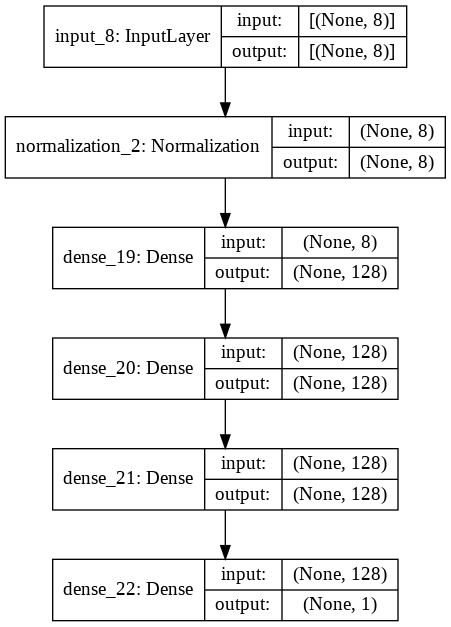

In [ ]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 153433.3906 - root_mean_squared_error: 202123.1406 - val_loss: 60263.9297 - val_root_mean_squared_error: 72829.0625
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 56026.2656 - root_mean_squared_error: 71011.3516 - val_loss: 45472.1758 - val_root_mean_squared_error: 56745.3438
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 53667.3594 - root_mean_squared_error: 69709.6016 - val_loss: 42714.7695 - val_root_mean_squared_error: 53672.2227
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 50040.4531 - root_mean_squared_error: 65046.1055 - val_loss: 38227.3203 - val_root_mean_squared_error: 47598.3086
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 42923.9805 - root_mean_squared_error: 53611.3828 - val_loss: 40198.9961 - val_root_mean_squared_error: 49557.1953
Epoch 6/100
25/25 [==============================] - 0s 4ms/st

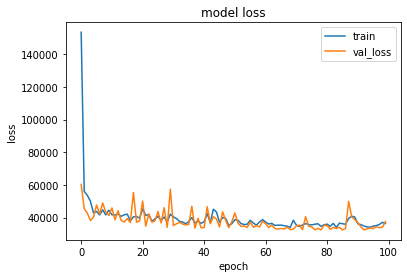

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

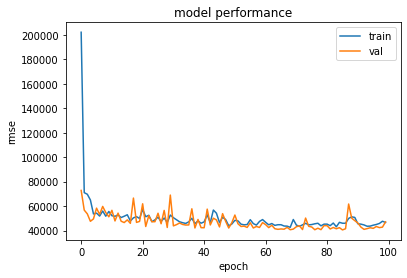

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## **Model Evaluation and Testing**

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 35082.9219 - root_mean_squared_error: 45458.8477


[35082.921875, 45458.84765625]

In [ ]:
X_test.shape

TensorShape([100, 8])

In [ ]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

array([[465634.7]], dtype=float32)

In [ ]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([465338.5], dtype=float32)>

In [ ]:
y_true = list(y_test[:,0].numpy())

In [ ]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

[465634.7, 346877.6, 316944.53, 541506.4, 177605.89, 389100.53, 407023.3, 215957.14, 242833.12, 316479.53, 283034.28, 523835.53, 235925.12, 169588.38, 246495.66, 424280.38, 444110.28, 253352.94, 513701.28, 460727.66, 276458.38, 214403.03, 220393.1, 129725.375, 274199.8, 336481.06, 316167.84, 176357.14, 176709.47, 405825.3, 221231.02, 321881.72, 127336.555, 208712.95, 467812.22, 380431.0, 361381.9, 239841.12, 464587.47, 369859.16, 224781.88, 238386.03, 266883.12, 335518.03, 312324.72, 240562.16, 132587.97, 422667.72, 228218.1, 156495.84, 365251.53, 194797.8, 401961.06, 387540.25, 478644.16, 227816.22, 383970.72, 210779.62, 291278.78, 175252.11, 266432.1, 148648.31, 415452.88, 305756.9, 166695.77, 475147.22, 512314.84, 143468.97, 374273.22, 158544.81, 360469.16, 567642.06, 540250.2, 481704.6, 80303.1, 459162.03, 461067.16, 429522.4, 455283.94, 331594.3, 284699.8, 276452.72, 209741.05, 270829.62, 190786.22, 299014.84, 246887.86, 353629.97, 380103.03, 175247.42, 199458.3, 491509.22, 252743

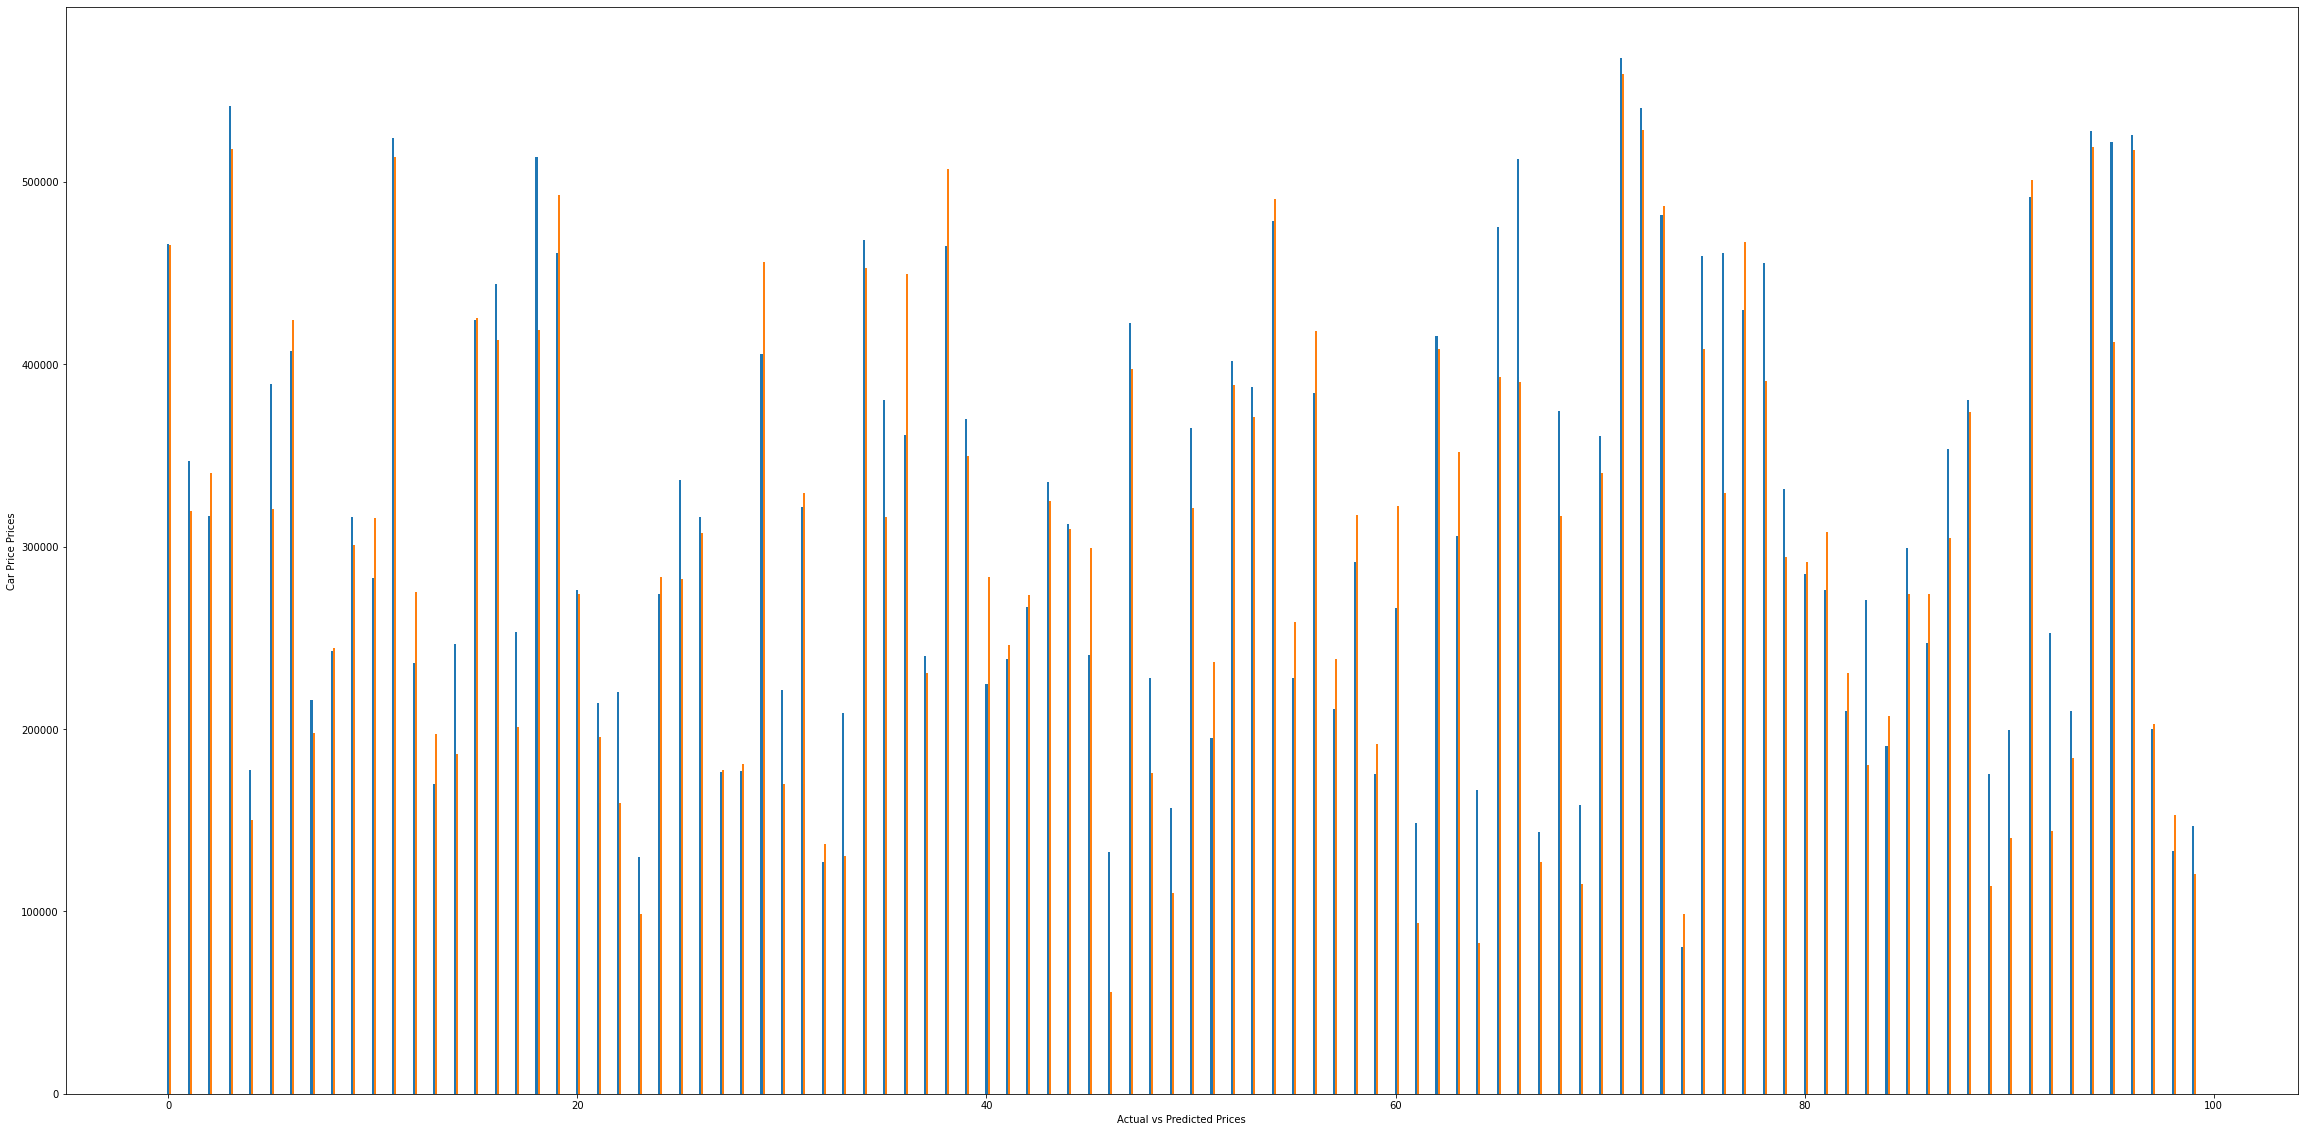

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()